<a href="https://colab.research.google.com/github/hritic/Machine-learning/blob/main/cifar10_191cs150_LAB9_densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visual Information Processing Lab**

### Datasets and Pre Processing

In [ ]:
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
import numpy as np

In [ ]:
#(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Training parameters
num_classes = 10

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


subtract_pixel_mean = True
# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

170508288/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)



(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AvgPool2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ReLU, concatenate
import tensorflow.keras.backend as K
# Creating Densenet121
def densenet(input_shape, n_classes, filters = 32):
  #batch norm + relu + conv
  def bn_rl_conv(x,filters,kernel=1,strides=1):
        
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(filters, kernel, strides=strides,padding = 'same')(x)
    return x
    
  def dense_block(x, repetition):
        
      for _ in range(repetition):
          y = bn_rl_conv(x, 4*filters)
          y = bn_rl_conv(y, filters, 3)
          x = concatenate([y,x])
      return x
        
  def transition_layer(x):
        
      x = bn_rl_conv(x, K.int_shape(x)[-1] //2 )
      x = AvgPool2D(2, strides = 2, padding = 'same')(x)
      return x
    
  input = Input (input_shape)
  x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
  x = MaxPool2D(3, strides = 2, padding = 'same')(x)
    
  for repetition in [6,12,24,16]:
        
    d = dense_block(x, repetition)
    x = transition_layer(d)   
  x = GlobalAveragePooling2D()(d)
  output = Dense(n_classes, activation = 'softmax')(x)
    
  model = Model(input, output)
  return model
input_shape = 32, 32, 3
n_classes = 10
model = densenet(input_shape,n_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 8, 8, 64)     0           ['conv2d[0][0]']                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 8, 8, 64)    256         ['max_pooling2d[0][0]']          
 alization)                                                                                   

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.700524 to fit



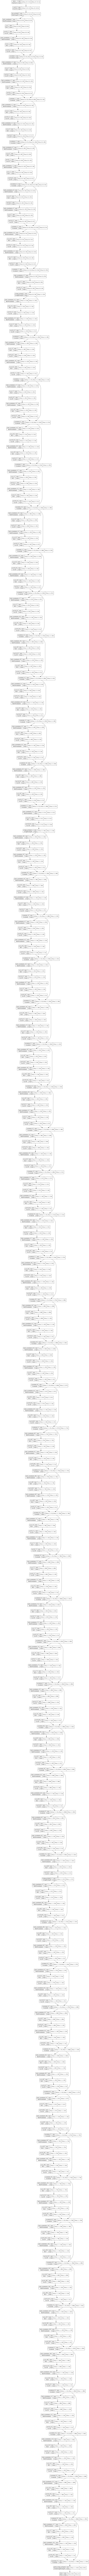

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
model=tensorflow.keras.applications.ResNet101V2(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(32,32,3),
    pooling=max,
    classes=10
)

print(model.summary())

Model: "resnet101v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                        

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.79665 to fit



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


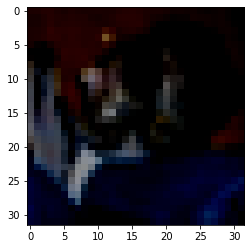

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_test[0])

### Compile and Training the model

In [ ]:
#os.chdir('/content/drive/MyDrive/MLlab pics/Weights/')

#print(os.getcwd())

from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN_Resnet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cv = keras.callbacks.CSVLogger('CNN_resnet.csv', separator=',', append=False)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Nadam", metrics=['accuracy'])
history=model.fit(x_train, y_train, validation_split=(0.2), batch_size=256, callbacks= [mc,cv],epochs=10, verbose=1)

Epoch 1/10
157/157 [==============================] - ETA: 0s - loss: 1.7996 - accuracy: 0.3692
Epoch 1: val_loss improved from inf to 2.52574, saving model to CNN_Resnet.h5
157/157 [==============================] - 145s 630ms/step - loss: 1.7996 - accuracy: 0.3692 - val_loss: 2.5257 - val_accuracy: 0.1747
Epoch 2/10
157/157 [==============================] - ETA: 0s - loss: 1.3907 - accuracy: 0.5057
Epoch 2: val_loss improved from 2.52574 to 2.35598, saving model to CNN_Resnet.h5
157/157 [==============================] - 95s 605ms/step - loss: 1.3907 - accuracy: 0.5057 - val_loss: 2.3560 - val_accuracy: 0.2569
Epoch 3/10
157/157 [==============================] - ETA: 0s - loss: 1.2811 - accuracy: 0.5535
Epoch 3: val_loss improved from 2.35598 to 1.64198, saving model to CNN_Resnet.h5
157/157 [==============================] - 95s 605ms/step - loss: 1.2811 - accuracy: 0.5535 - val_loss: 1.6420 - val_accuracy: 0.4522
Epoch 4/10
157/157 [==============================] - ETA: 0s - los

### Evaluate

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 15s 46ms/step - loss: 1.5957 - accuracy: 0.5844


[1.5957263708114624, 0.5843999981880188]

### Loss and Accuracy Curves

In [ ]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

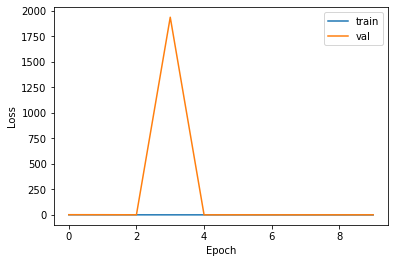

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

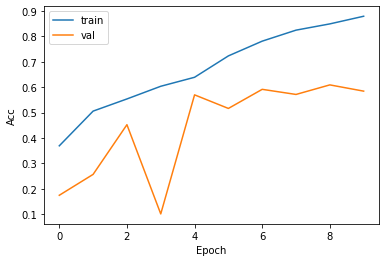

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [ ]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(x_test)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.69      0.63      0.66      1000
     class 1       0.73      0.76      0.74      1000
     class 2       0.40      0.62      0.49      1000
     class 3       0.46      0.36      0.40      1000
     class 4       0.51      0.41      0.46      1000
     class 5       0.54      0.48      0.51      1000
     class 6       0.89      0.36      0.51      1000
     class 7       0.50      0.83      0.63      1000
     class 8       0.67      0.81      0.74      1000
     class 9       0.78      0.57      0.66      1000

    accuracy                           0.58     10000
   macro avg       0.62      0.58      0.58     10000
weighted avg       0.62      0.58      0.58     10000



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[634  24 130  22  27   5   4  37  93  24]
 [ 34 761  34   9   5   2   0  10  74  71]
 [ 45   7 624  72  70  62   8  88  20   4]
 [ 31  11 151 360  77 176  17 128  33  16]
 [ 35   6 165  48 413  54   7 244  25   3]
 [ 16   3 137 111  39 477   5 176  25  11]
 [ 13  25 201 102 127  51 361  63  39  18]
 [  6   4  44  29  34  38   0 830   8   7]
 [ 60  35  39  15   6   4   3  16 813   9]
 [ 51 171  35  13  13  12   1  53  80 571]]


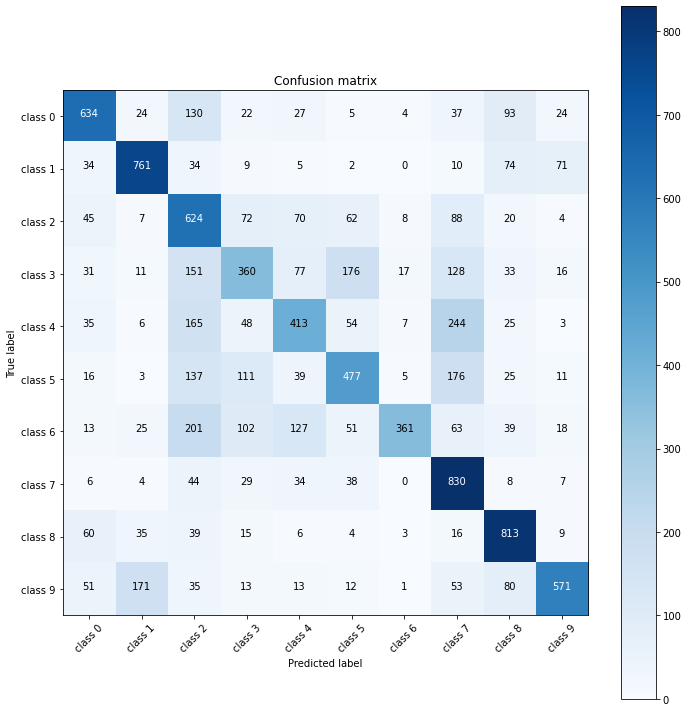

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.show()

## Visualization

In [ ]:
for layer in model.layers:
  print(layer)